### Table of Content

[1. Linearly separable](#1) <br>

[2. Polynomial Kernel for linearly <font color='red'>in</font>separable](#2) <br>

[3. Polynomial for linearly seperable problem (extra example)](#3) <br>

[4. RBF kernel for linearly <font color='red'>in</font>separable](#4) <br>

[5. Linear SVM with Gradient Descent](#5) <br>



## <a id='1'></a> 1. Linearly separable 

In [1]:
import numpy as np
X = np.array([[1,2],
              [2,1],
              [4,4],
              [5,5]])

y = np.array([-1,-1,1,1])

print(np.concatenate((X, y.reshape(-1,1)), axis=1))

[[ 1  2 -1]
 [ 2  1 -1]
 [ 4  4  1]
 [ 5  5  1]]


In [2]:
from sklearn.svm import SVC
svcModel = SVC(kernel='linear', tol=1e-10)

svcModel.fit(X, y)

print("Desired Output: \n" + str(y))
print("Scikit-learn Predicted Output: \n" + str(svcModel.predict(X)))
# svcModel.score(X, y)

Desired Output: 
[-1 -1  1  1]
Scikit-learn Predicted Output: 
[-1 -1  1  1]


In [3]:
svcModel.support_vectors_

array([[1., 2.],
       [2., 1.],
       [4., 4.]])

In [4]:
# Weights assigned to the features when kernel="linear"
svcModel.coef_ 

array([[0.4, 0.4]])

In [5]:
# Dual coefficients of the support vector in the decision function, multiplied by their targets
# beta_i = alpha_i * y_i
svcModel.dual_coef_ 

array([[-0.08, -0.08,  0.16]])

In [6]:
# b value
svcModel.intercept_

array([-2.2])

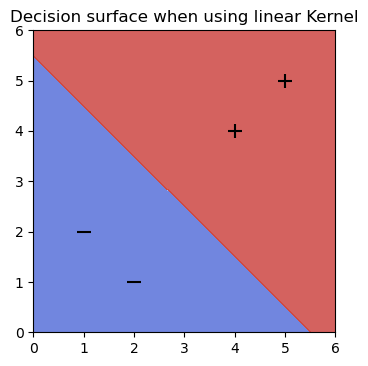

In [7]:
import matplotlib.pyplot as plt

def create_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def draw_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # predict for each grid point
    Z = Z.reshape(xx.shape) 
    out = ax.contourf(xx, yy, Z, **params) # filled contours
    return out

fig, ax = plt.subplots(dpi=100)
X0,X1 = X[:, 0], X[:, 1]
xx, yy = create_meshgrid(X0, X1) #create meshgrid, 6/0.02 = 300 points in x-axis and y-axis. 
draw_contours(ax, svcModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

X0_neg, X1_neg = X[:2, 0], X[:2, 1]
X0_pos, X1_pos = X[2:, 0], X[2:, 1]
# X0_neg, X1_neg = np.append(X[0,0], X[3,0]), np.append(X[0,1], X[3,1])  
# X0_pos, X1_pos = np.append(X[1,0], X[2,0]), np.append(X[1,1], X[2,1])

ax.scatter(X0_neg, X1_neg, c='k', marker='_', cmap=plt.cm.coolwarm, s=100)
ax.scatter(X0_pos, X1_pos, c='k', marker='+', cmap=plt.cm.coolwarm, s=100)

ax.set_ylim([0,6])
ax.set_xlim([0,6])
ax.set_title('Decision surface when using linear Kernel')
ax.set_aspect('equal', adjustable='box')
plt.savefig("Decision_surface_when_using_linear_Kernel.png", dpi=200)
plt.show()

## <a id='2'></a> 2. Polynomial Kernel for linearly inseparable
#### linearly inseparable --> mapping data to a high-dimensional feature space

In [8]:
import numpy as np
X = np.array([[1,0],
              [2,0],
              [0,0],
              [3,0]])

y = np.array([-1,-1,1,1])

print(np.concatenate((X, y.reshape(-1,1)), axis=1), "\n")

from sklearn.svm import SVC
svcModel = SVC(kernel='poly', gamma=1, degree=2, coef0=2, tol=1e-10) # degree is d, coef0 is r

svcModel.fit(X, y)

print("Desired Output: \n" + str(y))
print("Scikit-learn Predicted Output: \n" + str(svcModel.predict(X)))
#svcModel.score(X_test, y_test)

[[ 1  0 -1]
 [ 2  0 -1]
 [ 0  0  1]
 [ 3  0  1]] 

Desired Output: 
[-1 -1  1  1]
Scikit-learn Predicted Output: 
[-1 -1  1  1]


In [9]:
svcModel.support_vectors_

array([[1., 0.],
       [2., 0.],
       [0., 0.],
       [3., 0.]])

In [10]:
svcModel.dual_coef_

array([[-0.625, -1.   ,  1.   ,  0.625]])

In [11]:
svcModel.intercept_

array([1.])

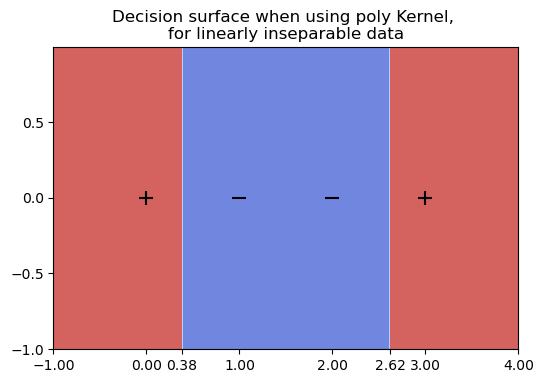

In [12]:
import matplotlib.pyplot as plt

def create_meshgrid(x, y, h=.01):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def draw_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # predict for each grid point
    Z = Z.reshape(xx.shape) 
    out = ax.contourf(xx, yy, Z, **params) # filled contours
    return out

fig, ax = plt.subplots(dpi=100)
X0,X1 = X[:, 0], X[:, 1]
xx, yy = create_meshgrid(X0, X1)
draw_contours(ax, svcModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

X0_neg, X1_neg = np.append(X[0,0], X[1,0]), np.append(X[0,1], X[1,1]) 
X0_pos, X1_pos = np.append(X[2,0], X[3,0]), np.append(X[2,1], X[3,1])

ax.scatter(X0_neg, X1_neg, c='k', marker='_', cmap=plt.cm.coolwarm, s=100)
ax.scatter(X0_pos, X1_pos, c='k', marker='+', cmap=plt.cm.coolwarm, s=100)

x_ticks = np.append(ax.get_xticks(), [0.38,2.62])
ax.set_xticks(x_ticks)
ax.set_yticks(np.arange(-1, 1, 0.5))

ax.set_title('Decision surface when using poly Kernel, \nfor linearly inseparable data')
plt.savefig("Decision surface when using poly Kernel for linearly inseparable data.png", dpi=200)

plt.show()

In [13]:
# from the original 0,1,2,3 (+,-,-,+)
# using poly kernal, K = [1*(x_i dot x_j) + 2]^2, where gamma=1, coef0=2, degree(power)=2
# transformed to the following X, in which depth (3rd coordinate) is omitted

import numpy as np
X = np.array([[2,1],
              [4,4],
              [0,0],
              [6,9]])

y = np.array([-1,-1,1,1])


from sklearn.svm import SVC
svcModel = SVC(kernel='linear', tol=1e-10)

svcModel.fit(X, y)

print("Desired Output: \n" + str(y))
print("Scikit-learn Predicted Output: \n" + str(svcModel.predict(X)))
#svcModel.score(X_test, y_test)

Desired Output: 
[-1 -1  1  1]
Scikit-learn Predicted Output: 
[-1 -1  1  1]


In [14]:
svcModel.support_vectors_

array([[2., 1.],
       [4., 4.],
       [0., 0.],
       [6., 9.]])

In [15]:
svcModel.dual_coef_

array([[-0.625, -1.   ,  1.   ,  0.625]])

In [16]:
svcModel.intercept_

array([1.])

In [17]:
svcModel.coef_ # the weights assigned to the features when kernel="linear"

array([[-1.5,  1. ]])

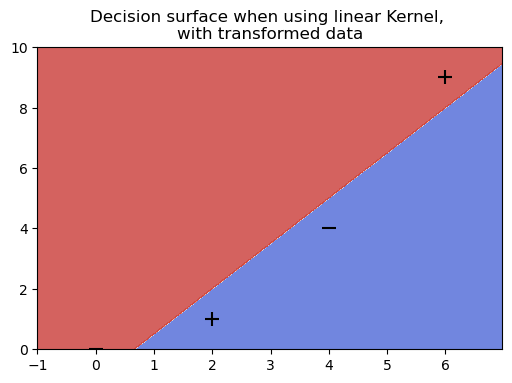

In [18]:
import matplotlib.pyplot as plt

def create_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def draw_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # predict for each grid point
    Z = Z.reshape(xx.shape) 
    out = ax.contourf(xx, yy, Z, **params) # filled contours
    return out

fig, ax = plt.subplots(dpi=100)
X0,X1 = X[:, 0], X[:, 1]
xx, yy = create_meshgrid(X0, X1)
draw_contours(ax, svcModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

X0_neg, X1_neg = np.append(X[1,0], X[2,0]), np.append(X[1,1], X[2,1]) 
X0_pos, X1_pos = np.append(X[0,0], X[3,0]), np.append(X[0,1], X[3,1])
ax.scatter(X0_neg, X1_neg, c='k', marker='_', cmap=plt.cm.coolwarm, s=100)
ax.scatter(X0_pos, X1_pos, c='k', marker='+', cmap=plt.cm.coolwarm, s=100)
ax.set_ylim([0,10])

ax.set_title('Decision surface when using linear Kernel, \nwith transformed data')
plt.savefig("Decision surface when using linear Kernel with transformed data.png", dpi=200)
plt.show()

## <a id='3'></a> 3. Polynomial for linearly seperable problem (extra example)

In [19]:
import numpy as np
X = np.array([[1,2],
              [2,1],
              [4,4],
              [5,5]])

y = np.array([-1,-1,1,1])

print(np.concatenate((X, y.reshape(-1,1)), axis=1))

[[ 1  2 -1]
 [ 2  1 -1]
 [ 4  4  1]
 [ 5  5  1]]


In [20]:
#Using the Scikit-learn machine learning library
from sklearn.svm import SVC
svcModel = SVC(kernel='poly', gamma=1, degree=2, tol=1e-10)

#X_test[0] = [2,3]
#X_test[2] = [-12,-3]
svcModel.fit(X, y)

print("Desired Output: \n" + str(y))
print("Scikit-learn Predicted Output: \n" + str(svcModel.predict(X)))
#svcModel.score(X_test, y_test)

Desired Output: 
[-1 -1  1  1]
Scikit-learn Predicted Output: 
[-1 -1  1  1]


In [21]:
svcModel.support_vectors_

array([[1., 2.],
       [2., 1.],
       [4., 4.]])

In [22]:
svcModel.dual_coef_

array([[-0.00132188, -0.00132188,  0.00264375]])

In [23]:
svcModel.intercept_

array([-1.32650364])

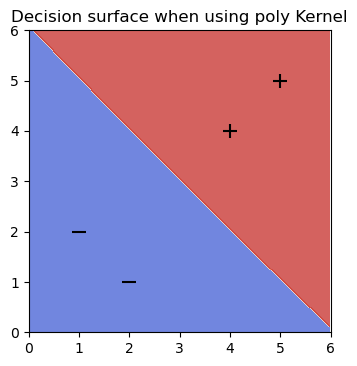

In [24]:
fig, ax = plt.subplots(dpi=100)
# Set-up grid for plotting.
X0_neg, X1_neg = X[:2, 0], X[:2, 1]
X0_pos, X1_pos = X[2:, 0], X[2:, 1]
X0,X1 = X[:, 0], X[:, 1]
xx, yy = create_meshgrid(X0, X1)
draw_contours(ax, svcModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0_neg, X1_neg, c='k', marker='_', cmap=plt.cm.coolwarm, s=100)
ax.scatter(X0_pos, X1_pos, c='k', marker='+', cmap=plt.cm.coolwarm, s=100)
# ax.set_ylabel('y label here')
# ax.set_xlabel('x label here')
# ax.set_xticks(())
# ax.set_yticks(())
ax.set_ylim([0,6])
ax.set_xlim([0,6])
ax.set_aspect('equal', adjustable='box')
ax.set_title('Decision surface when using poly Kernel')
# ax.legend()
plt.show()

<br>

## <a id='4'></a>4. RBF kernel for linearly inseparable
#### linearly inseparable --> mapping data to a high-dimensional feature space

In [25]:
import numpy as np
X = np.array([[1,2],
              [5,5],
              [2,1],
              [4,4]])

y = np.array([-1,-1,1,1])

print(np.concatenate((X, y.reshape(-1,1)), axis=1), "\n")

from sklearn.svm import SVC
svcModel = SVC(kernel='rbf', gamma=0.2, tol=1e-10)

svcModel.fit(X, y)

print("Desired Output: \n" + str(y))
print("Scikit-learn Predicted Output: \n" + str(svcModel.predict(X)))
#svcModel.score(X_test, y_test)

[[ 1  2 -1]
 [ 5  5 -1]
 [ 2  1  1]
 [ 4  4  1]] 

Desired Output: 
[-1 -1  1  1]
Scikit-learn Predicted Output: 
[-1 -1  1  1]


In [26]:
svcModel.support_vectors_

array([[1., 2.],
       [5., 5.],
       [2., 1.],
       [4., 4.]])

In [27]:
svcModel.dual_coef_

array([[-1., -1.,  1.,  1.]])

In [28]:
svcModel.intercept_

array([-0.03376782])

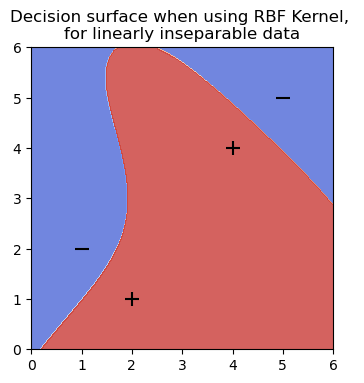

In [29]:
import matplotlib.pyplot as plt

def create_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def draw_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # predict for each grid point
    Z = Z.reshape(xx.shape) 
    out = ax.contourf(xx, yy, Z, **params) # filled contours
    return out

fig, ax = plt.subplots(dpi=100)
X0,X1 = X[:, 0], X[:, 1]
xx, yy = create_meshgrid(X0, X1)
draw_contours(ax, svcModel, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)


X0_neg, X1_neg = np.append(X[0,0], X[1,0]), np.append(X[0,1], X[1,1])
X0_pos, X1_pos = np.append(X[3,0], X[2,0]), np.append(X[3,1], X[2,1])
ax.scatter(X0_neg, X1_neg, c='k', marker='_', cmap=plt.cm.coolwarm, s=100)
ax.scatter(X0_pos, X1_pos, c='k', marker='+', cmap=plt.cm.coolwarm, s=100)
ax.set_ylim([0,6])
ax.set_xlim([0,6])
ax.set_aspect('equal', adjustable='box')

ax.set_title('Decision surface when using RBF Kernel, \nfor linearly inseparable data')
plt.savefig("Decision surface when using RBF Kernel for linearly inseparable data.png", dpi=200)
plt.show()


# <a id='5'></a> 5. Linear SVM with Gradient Descent

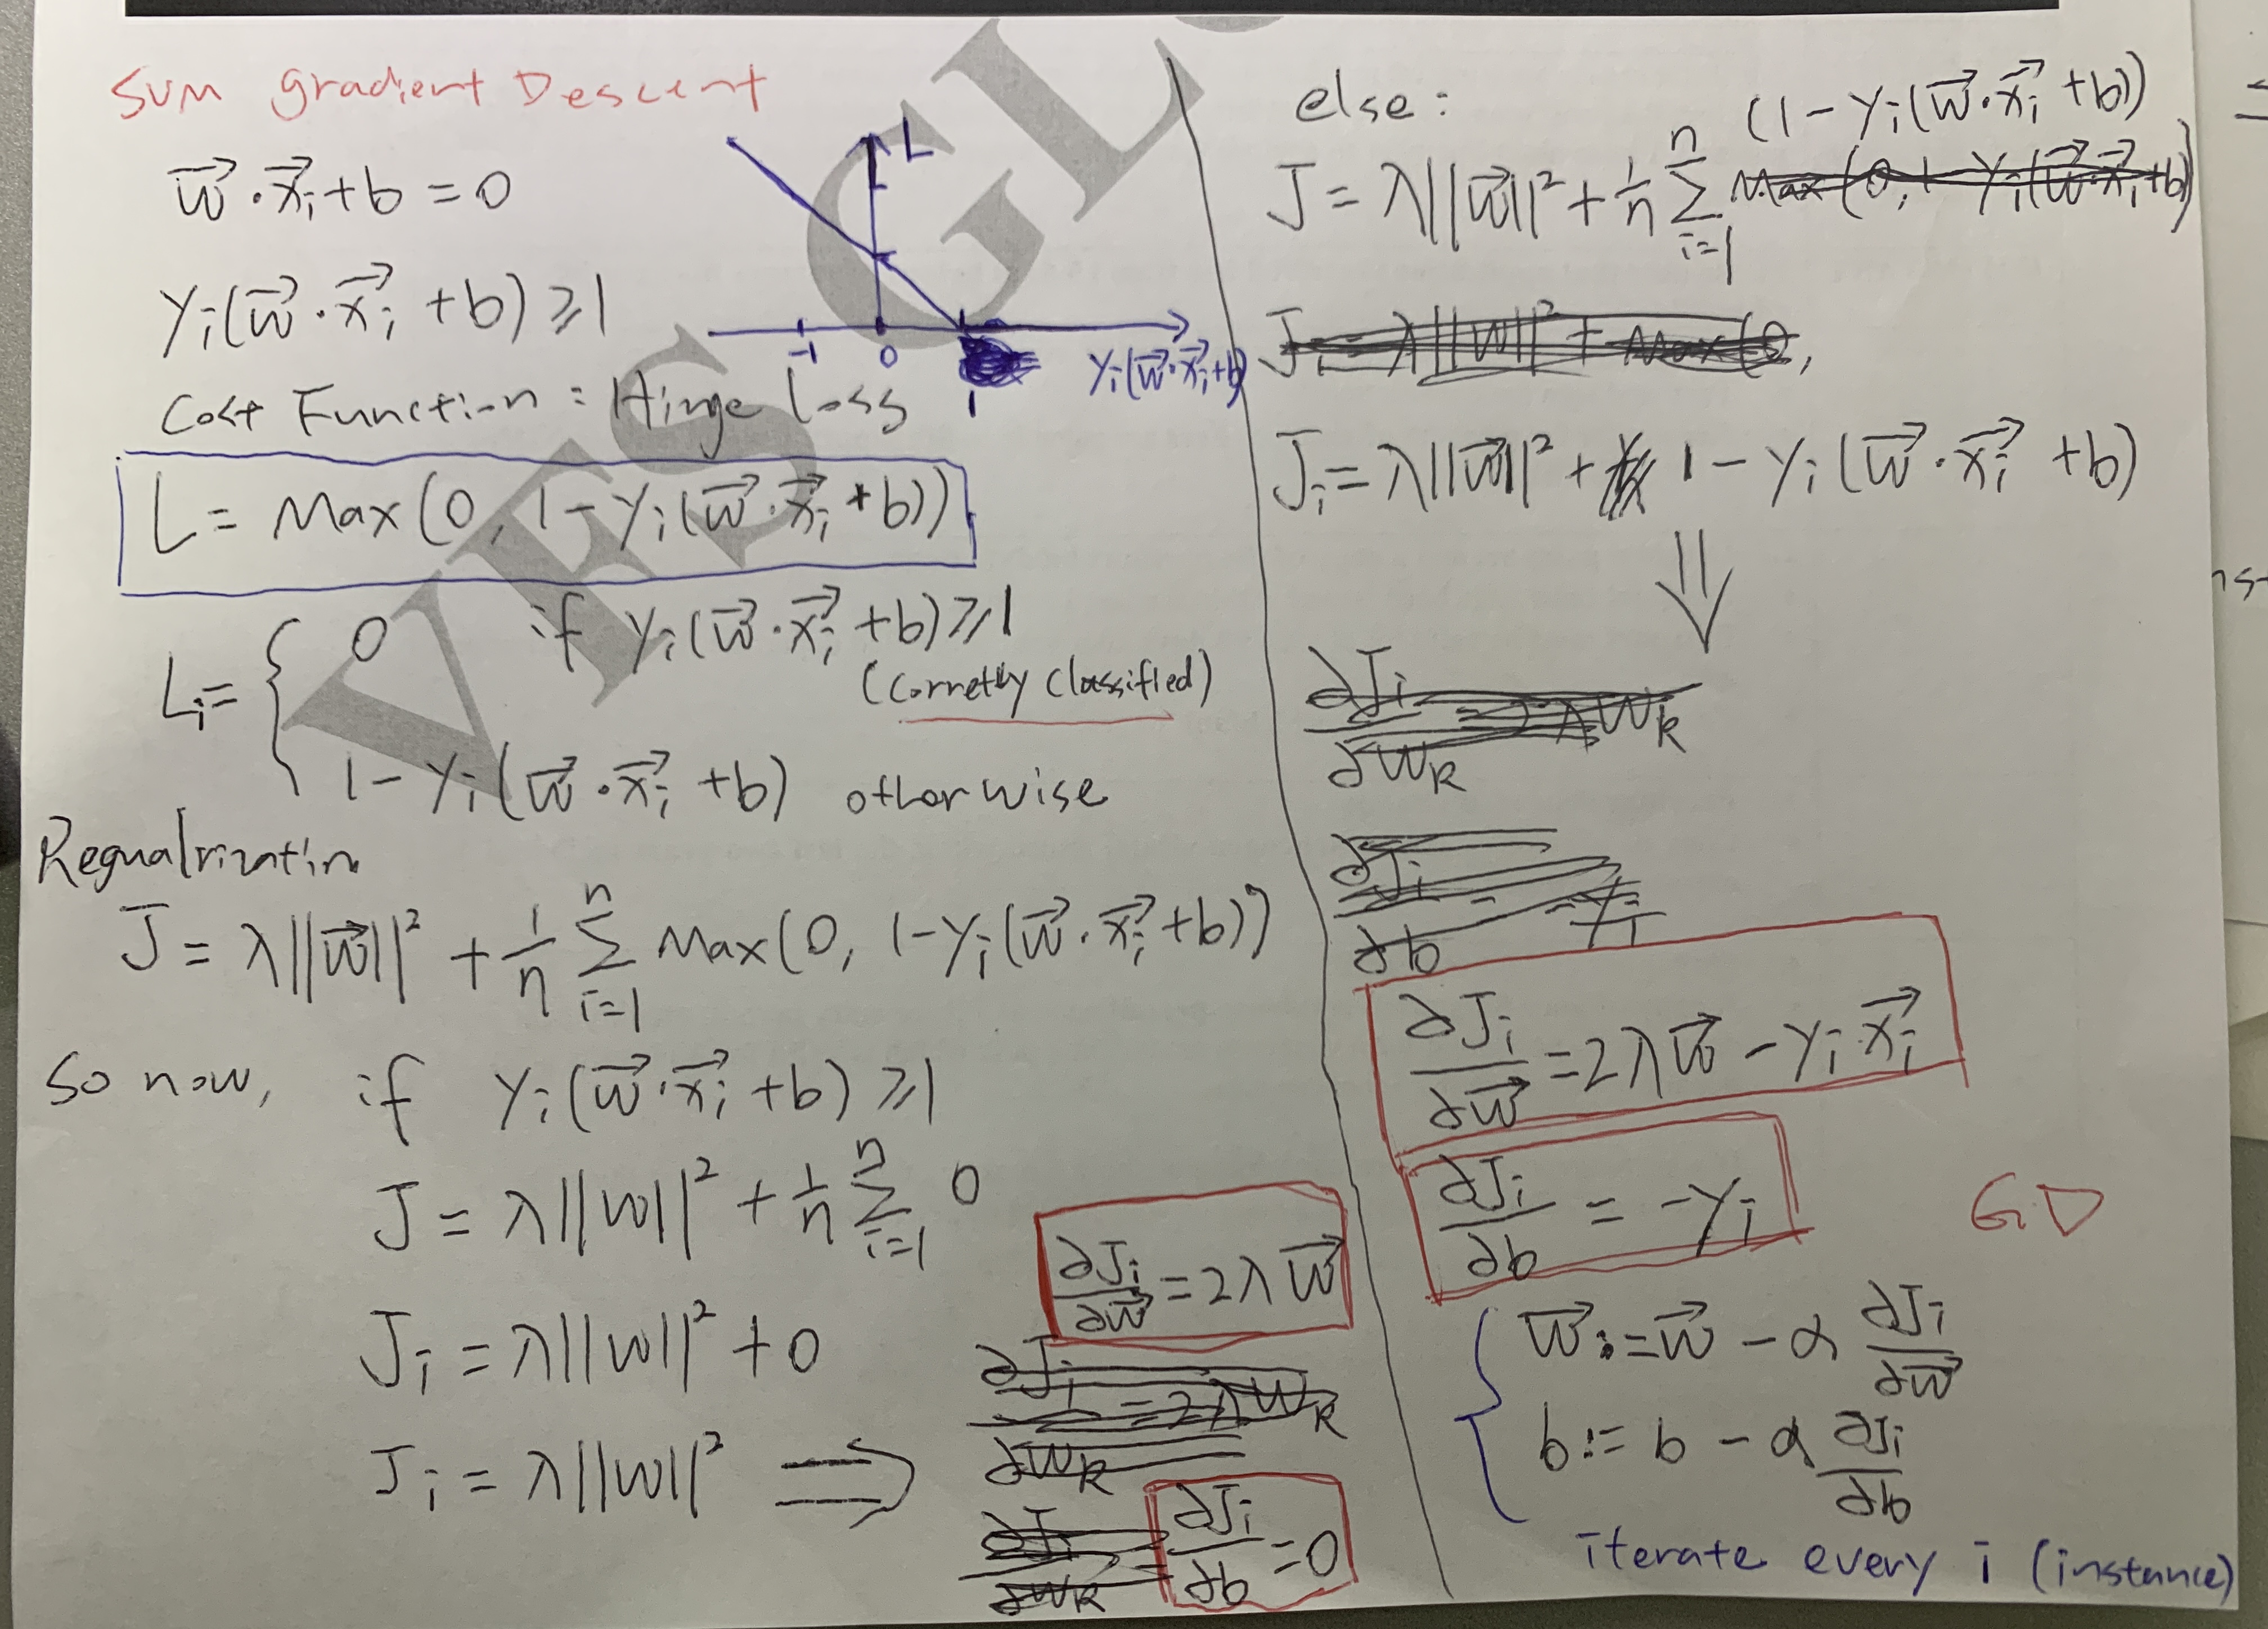

In [30]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x - b + offset) / w[1]
        
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    # plt.scatter(X[:5,0], X[:5,1], marker='_', c='k', s=100)
    # plt.scatter(X[5:,0], X[5:,1], marker='+', c='k', s=100)
    plt.scatter(X[:2,0], X[:2,1], marker='_', c='k', s=100)
    plt.scatter(X[2:,0], X[2:,1], marker='+', c='k', s=100)
    
    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])
    
    x1_1 = get_hyperplane_value(0, svmModel.w, svmModel.b, 0)
    x1_2 = get_hyperplane_value(6, svmModel.w, svmModel.b, 0)
    
    x1_1_m = get_hyperplane_value(0, svmModel.w, svmModel.b, -1)
    x1_2_m = get_hyperplane_value(6, svmModel.w, svmModel.b, -1)
    
    x1_1_p = get_hyperplane_value(0, svmModel.w, svmModel.b, 1)
    x1_2_p = get_hyperplane_value(6, svmModel.w, svmModel.b, 1)
    
    ax.plot([0, 6],[x1_1, x1_2], 'r--')
    ax.plot([0, 6],[x1_1_m, x1_2_m], 'k', linewidth=0.8)
    ax.plot([0, 6],[x1_1_p, x1_2_p], 'k', linewidth=0.8)
    
    # x1_min = np.amin(X[:,1])
    # x1_max = np.amax(X[:,1])
    ax.set_ylim([0,6])
    ax.set_xlim([0,6])
    
    ax.set_aspect('equal', adjustable='box')

    plt.savefig("svm1.png", dpi=200)
    plt.show()

# visualize_svm()

In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

class SVM:
    def __init__(self, learning_rate=0.0001, lambda_param=0.01, n_iters=100000):
        #variables 
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1) #denote in -1 and 1
        
        #initiate as 0 for w and b
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X): #Linear model
                is_greater_equal_1 = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1 #Condition for Gradients
                if is_greater_equal_1: 
                    self.w = self.w - self.lr * (2 * self.lambda_param * self.w) #update, formula from lecture 4 note
                else:
                    self.w = self.w - self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])) #update rule
                    self.b = self.b - self.lr * (-y_[idx])

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

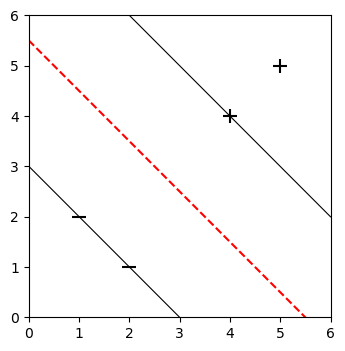

Desired Output: 
[-1 -1  1  1]
Predicted Output: 
[-1. -1.  1.  1.]


In [32]:
import numpy as np
X = np.array([[1,2],
              [2,1],
              # [1,1],
              # [0.2,1.8],
              # [2,0.5],
              [4,4],
              [5,5],
              # [4.5, 4.5],
              # [5.5, 4],
              # [4,5.5]
             ])

y = np.array([-1,-1,1,1])
# y = np.array([-1,-1,-1,-1,-1,1,1,1,1,1])

svmModel = SVM()
svmModel.fit(X, y)

visualize_svm()

print("Desired Output: \n" + str(y))
print("Predicted Output: \n" + str(svmModel.predict(X)))

In [33]:
print("weights:", svmModel.w)
print("bia:", svmModel.b)

weights: [0.40055953 0.40005857]
bia: -2.201700000000222
